In [1]:
from my_run import *
from shapely.geometry import MultiPolygon, Polygon
%matplotlib inline

In [2]:
classes = [
    "placeholder",
    "房屋和楼房",
    "混杂的人工建筑",
    "道路",
    "铁路",
    "树木",
    "农作物",
    "河流",
    "积水区",
    "大型车辆",
    "小轿车"
]

In [3]:
ImageId = "6120_2_2"
ClassType = 1
BandNo = 5

In [4]:
model = load_model('unet_42quality.hdf5', custom_objects={'jaccard_coef': jaccard_coef, 'jaccard_coef_int': jaccard_coef_int})

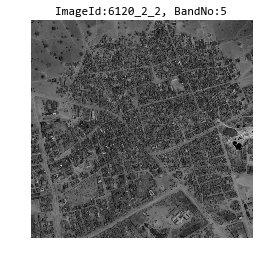

In [5]:
image = M(ImageId)
gray = image[:,:,BandNo]
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(gray)
plt.imshow(clahe, cmap="gray")
# plt.imshow(image[:,:,BandNo], cmap="gray")
plt.title('ImageId:{}, BandNo:{}'.format(ImageId, BandNo))
_ = plt.axis("off")

In [6]:
predict_output = predict_id(ImageId, model, None)
predict_output.shape

(10, 837, 851)

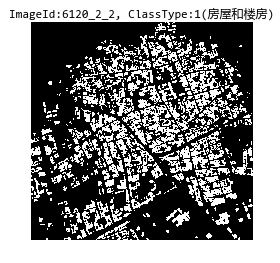

In [7]:
plt.imshow(predict_output[ClassType-1], cmap="gray")
plt.title('ImageId:{}, ClassType:{}({})'.format(ImageId, ClassType, classes[ClassType]))
_ = plt.axis("off")

In [8]:
try:
    multipolygon_wkt = DF[DF.ImageId==ImageId][DF.ClassType==ClassType].MultipolygonWKT.values[0]
except:
    multipolygon_wkt = None
    print "MultipolygonWKT for ImageId:{}, ClassType:{}({}) not found.".format(ImageId, ClassType, classes[ClassType])
if multipolygon_wkt is not None:
    with open("MultipolygonWKT.txt", "w+") as f:
        f.write(multipolygon_wkt)

# 拼接25张影像

In [ ]:
stick_all_train()

let's stick all imgs together
25
((837, 849, 8), '6010_1_2', 1.0, 0.0)
((837, 849, 8), '6010_4_2', 1.0, 0.0)
((837, 848, 8), '6010_4_4', 1.0, 0.0)
((837, 848, 8), '6040_1_0', 1.0, 0.0)
((837, 848, 8), '6040_1_3', 1.0, 0.0)
((837, 848, 8), '6040_2_2', 1.0, 0.0)
((837, 846, 8), '6040_4_4', 1.0, 0.0)
((837, 851, 8), '6060_2_3', 1.0, 0.0)
((838, 835, 8), '6070_2_3', 1.0, 0.0)
((837, 848, 8), '6090_2_0', 1.0, 0.0)
((837, 848, 8), '6100_1_3', 1.0, 0.0)
((837, 848, 8), '6100_2_2', 1.0, 0.0)
((837, 848, 8), '6100_2_3', 1.0, 0.0)
((837, 849, 8), '6110_1_2', 1.0, 0.0)
((837, 849, 8), '6110_3_1', 1.0, 0.0)
((837, 849, 8), '6110_4_0', 1.0, 0.0)
((837, 851, 8), '6120_2_0', 1.0, 0.0)
((837, 851, 8), '6120_2_2', 1.0, 0.0)
((837, 849, 8), '6140_1_2', 1.0, 0.0)
((837, 849, 8), '6140_3_1', 1.0, 0.0)
((837, 851, 8), '6150_2_3', 1.0, 0.0)
((837, 848, 8), '6160_2_1', 1.0, 0.0)
((837, 848, 8), '6170_0_4', 1.0, 0.0)
((837, 848, 8), '6170_2_4', 1.0, 0.0)
((837, 848, 8), '6170_4_1', 1.0, 0.0)
(1.0, 0.0)


In [ ]:
x_trn = np.load('data/x_trn_10.npy')
y_trn = np.load('data/y_trn_10.npy')

In [ ]:
x_trn.shape, y_trn.shape

In [ ]:
plt.imshow(x_trn[:,:,BandNo])

# 参考代码[[LB 0.42]Ultimate full solution (run on your HW)](https://www.kaggle.com/ceperaang/lb-0-42-ultimate-full-solution-run-on-your-hw)

In [ ]:
# __author__ = "n01z3"

# import matplotlib.pyplot as plt
# import numpy as np
# import cv2
# import pandas as pd
# from shapely.wkt import loads as wkt_loads
# import tifffile as tiff
# import os
# import random
# from keras.models import Model, load_model
# from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout
# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler
# from keras import backend as K
# from sklearn.metrics import jaccard_similarity_score
# from shapely.geometry import MultiPolygon, Polygon
# import shapely.wkt
# import shapely.affinity
# from collections import defaultdict

# N_Cls = 10
# DF = pd.read_csv('train_wkt_v4.csv')
# GS = pd.read_csv('grid_sizes.csv', names=['ImageId', 'Xmax', 'Ymin'], skiprows=1)
# SB = pd.read_csv('sample_submission.csv')
# ISZ = 160
# smooth = 1e-12


# def _convert_coordinates_to_raster(coords, img_size, xymax):
#     # __author__ = visoft
#     # https://www.kaggle.com/visoft/dstl-satellite-imagery-feature-detection/export-pixel-wise-mask
#     Xmax, Ymax = xymax
#     H, W = img_size
#     W1 = 1.0 * W * W / (W + 1)
#     H1 = 1.0 * H * H / (H + 1)
#     xf = W1 / Xmax
#     yf = H1 / Ymax
#     coords[:, 1] *= yf
#     coords[:, 0] *= xf
#     coords_int = np.round(coords).astype(np.int32)
#     return coords_int


# def _get_xmax_ymin(grid_sizes_panda, imageId):
#     # __author__ = visoft
#     # https://www.kaggle.com/visoft/dstl-satellite-imagery-feature-detection/export-pixel-wise-mask
#     xmax, ymin = grid_sizes_panda[grid_sizes_panda.ImageId == imageId].iloc[0, 1:].astype(float)
#     return (xmax, ymin)


# def _get_polygon_list(wkt_list_pandas, imageId, cType):
#     # __author__ = visoft
#     # https://www.kaggle.com/visoft/dstl-satellite-imagery-feature-detection/export-pixel-wise-mask
#     df_image = wkt_list_pandas[wkt_list_pandas.ImageId == imageId]
#     multipoly_def = df_image[df_image.ClassType == cType].MultipolygonWKT
#     polygonList = None
#     if len(multipoly_def) > 0:
#         assert len(multipoly_def) == 1
#         polygonList = wkt_loads(multipoly_def.values[0])
#     return polygonList


# def _get_and_convert_contours(polygonList, raster_img_size, xymax):
#     # __author__ = visoft
#     # https://www.kaggle.com/visoft/dstl-satellite-imagery-feature-detection/export-pixel-wise-mask
#     perim_list = []
#     interior_list = []
#     if polygonList is None:
#         return None
#     for k in range(len(polygonList)):
#         poly = polygonList[k]
#         perim = np.array(list(poly.exterior.coords))
#         perim_c = _convert_coordinates_to_raster(perim, raster_img_size, xymax)
#         perim_list.append(perim_c)
#         for pi in poly.interiors:
#             interior = np.array(list(pi.coords))
#             interior_c = _convert_coordinates_to_raster(interior, raster_img_size, xymax)
#             interior_list.append(interior_c)
#     return perim_list, interior_list


# def _plot_mask_from_contours(raster_img_size, contours, class_value=1):
#     # __author__ = visoft
#     # https://www.kaggle.com/visoft/dstl-satellite-imagery-feature-detection/export-pixel-wise-mask
#     img_mask = np.zeros(raster_img_size, np.uint8)
#     if contours is None:
#         return img_mask
#     perim_list, interior_list = contours
#     cv2.fillPoly(img_mask, perim_list, class_value)
#     cv2.fillPoly(img_mask, interior_list, 0)
#     return img_mask


# def generate_mask_for_image_and_class(raster_size, imageId, class_type, grid_sizes_panda=GS, wkt_list_pandas=DF):
#     # __author__ = visoft
#     # https://www.kaggle.com/visoft/dstl-satellite-imagery-feature-detection/export-pixel-wise-mask
#     xymax = _get_xmax_ymin(grid_sizes_panda, imageId)
#     polygon_list = _get_polygon_list(wkt_list_pandas, imageId, class_type)
#     contours = _get_and_convert_contours(polygon_list, raster_size, xymax)
#     mask = _plot_mask_from_contours(raster_size, contours, 1)
#     return mask


# def M(image_id):
#     # __author__ = amaia
#     # https://www.kaggle.com/aamaia/dstl-satellite-imagery-feature-detection/rgb-using-m-bands-example
#     img = tiff.imread('sixteen_band/{}_M.tif'.format(image_id))
#     img = np.rollaxis(img, 0, 3)
#     return img


# def stretch_n(bands, lower_percent=0, higher_percent=100):
#     out = np.zeros_like(bands, dtype=np.float32)
#     n = bands.shape[2]
#     for i in range(n):
#         a = 0  # np.min(band)
#         b = 1  # np.max(band)
#         c = np.percentile(bands[:, :, i], lower_percent)
#         d = np.percentile(bands[:, :, i], higher_percent)
#         t = a + (bands[:, :, i] - c) * (b - a) / (d - c)
#         t[t < a] = a
#         t[t > b] = b
#         out[:, :, i] = t

#     return out.astype(np.float32)


# def jaccard_coef(y_true, y_pred):
#     # __author__ = Vladimir Iglovikov
#     intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
#     sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

#     jac = (intersection + smooth) / (sum_ - intersection + smooth)

#     return K.mean(jac)


# def jaccard_coef_int(y_true, y_pred):
#     # __author__ = Vladimir Iglovikov
#     y_pred_pos = K.round(K.clip(y_pred, 0, 1))

#     intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
#     sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])
#     jac = (intersection + smooth) / (sum_ - intersection + smooth)
#     return K.mean(jac)


# def stick_all_train():
#     print("let's stick all imgs together")
#     s = 835

#     x = np.zeros((5 * s, 5 * s, 8))
#     y = np.zeros((5 * s, 5 * s, N_Cls))

#     ids = sorted(DF.ImageId.unique())
#     print(len(ids))
#     for i in range(5):
#         for j in range(5):
#             id = ids[5 * i + j]

#             img = M(id)
#             img = stretch_n(img)
#             print(img.shape, id, np.amax(img), np.amin(img))
#             x[s * i:s * i + s, s * j:s * j + s, :] = img[:s, :s, :]
#             for z in range(N_Cls):
#                 y[s * i:s * i + s, s * j:s * j + s, z] = generate_mask_for_image_and_class(
#                     (img.shape[0], img.shape[1]), id, z + 1)[:s, :s]

#     print(np.amax(y), np.amin(y))

#     np.save('data/x_trn_%d' % N_Cls, x)
#     np.save('data/y_trn_%d' % N_Cls, y)


# def get_patches(img, msk, amt=10000, aug=True):
#     is2 = int(1.0 * ISZ)
#     xm, ym = img.shape[0] - is2, img.shape[1] - is2

#     x, y = [], []

#     tr = [0.4, 0.1, 0.1, 0.15, 0.3, 0.95, 0.1, 0.05, 0.001, 0.005]
#     for i in range(amt):
#         xc = random.randint(0, xm)
#         yc = random.randint(0, ym)

#         im = img[xc:xc + is2, yc:yc + is2]
#         ms = msk[xc:xc + is2, yc:yc + is2]

#         for j in range(N_Cls):
#             sm = np.sum(ms[:, :, j])
#             if 1.0 * sm / is2 ** 2 > tr[j]:
#                 if aug:
#                     if random.uniform(0, 1) > 0.5:
#                         im = im[::-1]
#                         ms = ms[::-1]
#                     if random.uniform(0, 1) > 0.5:
#                         im = im[:, ::-1]
#                         ms = ms[:, ::-1]

#                 x.append(im)
#                 y.append(ms)

#     x, y = 2 * np.transpose(x, (0, 3, 1, 2)) - 1, np.transpose(y, (0, 3, 1, 2))
#     print(x.shape, y.shape, np.amax(x), np.amin(x), np.amax(y), np.amin(y))
#     return x, y


# def make_val():
#     print("let's pick some samples for validation")
#     img = np.load('data/x_trn_%d.npy' % N_Cls)
#     msk = np.load('data/y_trn_%d.npy' % N_Cls)
#     x, y = get_patches(img, msk, amt=3000)

#     np.save('data/x_tmp_%d' % N_Cls, x)
#     np.save('data/y_tmp_%d' % N_Cls, y)


# def get_unet():
#     inputs = Input((8, ISZ, ISZ))
#     conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(inputs)
#     conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#     conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool1)
#     conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#     conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(pool2)
#     conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

#     conv4 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(pool3)
#     conv4 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

#     conv5 = Convolution2D(512, 3, 3, activation='relu', border_mode='same')(pool4)
#     conv5 = Convolution2D(512, 3, 3, activation='relu', border_mode='same')(conv5)

#     up6 = merge([UpSampling2D(size=(2, 2))(conv5), conv4], mode='concat', concat_axis=1)
#     conv6 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(up6)
#     conv6 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(conv6)

#     up7 = merge([UpSampling2D(size=(2, 2))(conv6), conv3], mode='concat', concat_axis=1)
#     conv7 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(up7)
#     conv7 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv7)

#     up8 = merge([UpSampling2D(size=(2, 2))(conv7), conv2], mode='concat', concat_axis=1)
#     conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up8)
#     conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv8)

#     up9 = merge([UpSampling2D(size=(2, 2))(conv8), conv1], mode='concat', concat_axis=1)
#     conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(up9)
#     conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv9)

#     conv10 = Convolution2D(N_Cls, 1, 1, activation='sigmoid')(conv9)

#     model = Model(input=inputs, output=conv10)
#     model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[jaccard_coef, jaccard_coef_int, 'accuracy'])
#     return model


# def calc_jacc(model):
#     img = np.load('data/x_tmp_%d.npy' % N_Cls)
#     msk = np.load('data/y_tmp_%d.npy' % N_Cls)

#     prd = model.predict(img, batch_size=4)
#     print(prd.shape, msk.shape)
#     avg, trs = [], []

#     for i in range(N_Cls):
#         t_msk = msk[:, i, :, :]
#         t_prd = prd[:, i, :, :]
#         t_msk = t_msk.reshape(msk.shape[0] * msk.shape[2], msk.shape[3])
#         t_prd = t_prd.reshape(msk.shape[0] * msk.shape[2], msk.shape[3])

#         m, b_tr = 0, 0
#         for j in range(10):
#             tr = j / 10.0
#             pred_binary_mask = t_prd > tr

#             jk = jaccard_similarity_score(t_msk, pred_binary_mask)
#             if jk > m:
#                 m = jk
#                 b_tr = tr
#         print(i, m, b_tr)
#         avg.append(m)
#         trs.append(b_tr)

#     score = sum(avg) / 10.0
#     return score, trs


# def mask_for_polygons(polygons, im_size):
#     # __author__ = Konstantin Lopuhin
#     # https://www.kaggle.com/lopuhin/dstl-satellite-imagery-feature-detection/full-pipeline-demo-poly-pixels-ml-poly
#     img_mask = np.zeros(im_size, np.uint8)
#     if not polygons:
#         return img_mask
#     int_coords = lambda x: np.array(x).round().astype(np.int32)
#     exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
#     interiors = [int_coords(pi.coords) for poly in polygons
#                  for pi in poly.interiors]
#     cv2.fillPoly(img_mask, exteriors, 1)
#     cv2.fillPoly(img_mask, interiors, 0)
#     return img_mask


# def mask_to_polygons(mask, epsilon=1, min_area=1.):
#     # __author__ = Konstantin Lopuhin
#     # https://www.kaggle.com/lopuhin/dstl-satellite-imagery-feature-detection/full-pipeline-demo-poly-pixels-ml-poly

#     # first, find contours with cv2: it's much faster than shapely
#     image, contours, hierarchy = cv2.findContours(
#         ((mask == 1) * 255).astype(np.uint8),
#         cv2.RETR_CCOMP, cv2.CHAIN_APPROX_TC89_KCOS)
#     # create approximate contours to have reasonable submission size
#     approx_contours = [cv2.approxPolyDP(cnt, epsilon, True)
#                        for cnt in contours]
#     if not contours:
#         return MultiPolygon()
#     # now messy stuff to associate parent and child contours
#     cnt_children = defaultdict(list)
#     child_contours = set()
#     assert hierarchy.shape[0] == 1
#     # http://docs.opencv.org/3.1.0/d9/d8b/tutorial_py_contours_hierarchy.html
#     for idx, (_, _, _, parent_idx) in enumerate(hierarchy[0]):
#         if parent_idx != -1:
#             child_contours.add(idx)
#             cnt_children[parent_idx].append(approx_contours[idx])
#     # create actual polygons filtering by area (removes artifacts)
#     all_polygons = []
#     for idx, cnt in enumerate(approx_contours):
#         if idx not in child_contours and cv2.contourArea(cnt) >= min_area:
#             assert cnt.shape[1] == 1
#             poly = Polygon(
#                 shell=cnt[:, 0, :],
#                 holes=[c[:, 0, :] for c in cnt_children.get(idx, [])
#                        if cv2.contourArea(c) >= min_area])
#             all_polygons.append(poly)
#     # approximating polygons might have created invalid ones, fix them
#     all_polygons = MultiPolygon(all_polygons)
#     if not all_polygons.is_valid:
#         all_polygons = all_polygons.buffer(0)
#         # Sometimes buffer() converts a simple Multipolygon to just a Polygon,
#         # need to keep it a Multi throughout
#         if all_polygons.type == 'Polygon':
#             all_polygons = MultiPolygon([all_polygons])
#     return all_polygons


# def get_scalers(im_size, x_max, y_min):
#     # __author__ = Konstantin Lopuhin
#     # https://www.kaggle.com/lopuhin/dstl-satellite-imagery-feature-detection/full-pipeline-demo-poly-pixels-ml-poly
#     h, w = im_size  # they are flipped so that mask_for_polygons works correctly
#     h, w = float(h), float(w)
#     w_ = 1.0 * w * (w / (w + 1))
#     h_ = 1.0 * h * (h / (h + 1))
#     return w_ / x_max, h_ / y_min


# def train_net():
#     print("start train net")
#     x_val, y_val = np.load('data/x_tmp_%d.npy' % N_Cls), np.load('data/y_tmp_%d.npy' % N_Cls)
#     img = np.load('data/x_trn_%d.npy' % N_Cls)
#     msk = np.load('data/y_trn_%d.npy' % N_Cls)

#     x_trn, y_trn = get_patches(img, msk)

#     model = get_unet()
#     model.load_weights('weights/unet_10_jk0.7878')
#     model_checkpoint = ModelCheckpoint('weights/unet_tmp.hdf5', monitor='loss', save_best_only=True)
#     for i in range(1):
#         model.fit(x_trn, y_trn, batch_size=64, nb_epoch=1, verbose=1, shuffle=True,
#                   callbacks=[model_checkpoint], validation_data=(x_val, y_val))
#         del x_trn
#         del y_trn
#         x_trn, y_trn = get_patches(img, msk)
#         score, trs = calc_jacc(model)
#         print('val jk', score)
#         model.save_weights('weights/unet_10_jk%.4f' % score)

#     return model


# def predict_id(id, model, trs):
#     img = M(id)
#     x = stretch_n(img)

#     cnv = np.zeros((960, 960, 8)).astype(np.float32)
#     prd = np.zeros((N_Cls, 960, 960)).astype(np.float32)
#     cnv[:img.shape[0], :img.shape[1], :] = x

#     for i in range(0, 6):
#         line = []
#         for j in range(0, 6):
#             line.append(cnv[i * ISZ:(i + 1) * ISZ, j * ISZ:(j + 1) * ISZ])

#         x = 2 * np.transpose(line, (0, 3, 1, 2)) - 1
#         tmp = model.predict(x, batch_size=4)
#         for j in range(tmp.shape[0]):
#             prd[:, i * ISZ:(i + 1) * ISZ, j * ISZ:(j + 1) * ISZ] = tmp[j]

#     trs = [0.4, 0.1, 0.4, 0.3, 0.3, 0.5, 0.3, 0.6, 0.1, 0.1]
#     for i in range(N_Cls):
#         prd[i] = prd[i] > trs[i]

#     return prd[:, :img.shape[0], :img.shape[1]]


# def predict_test(model, trs = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]):
#     print("predict test")
#     for i, id in enumerate(sorted(set(SB['ImageId'].tolist()))):
#         msk = predict_id(id, model, trs)
#         np.save('msk/10_%s' % id, msk)
#         if i % 100 == 0: print(i, id)


# def make_submit():
#     print("make submission file")
#     df = pd.read_csv('sample_submission.csv')
#     print(df.head())
#     for idx, row in df.iterrows():
#         id = row[0]
#         kls = row[1] - 1

#         msk = np.load('msk/10_%s.npy' % id)[kls]
#         pred_polygons = mask_to_polygons(msk)
#         x_max = GS.loc[GS['ImageId'] == id, 'Xmax'].as_matrix()[0]
#         y_min = GS.loc[GS['ImageId'] == id, 'Ymin'].as_matrix()[0]

#         x_scaler, y_scaler = get_scalers(msk.shape, x_max, y_min)

#         scaled_pred_polygons = shapely.affinity.scale(pred_polygons, xfact=1.0 / x_scaler, yfact=1.0 / y_scaler,
#                                                       origin=(0, 0, 0))

#         df.iloc[idx, 2] = shapely.wkt.dumps(scaled_pred_polygons)
#         if idx % 100 == 0: print(idx)
#     print(df.head())
#     df.to_csv('subm/1.csv', index=False)


# def check_predict(id='6120_2_3'):
#     model = get_unet()
#     model.load_weights('weights/unet_10_jk0.7878')

#     msk = predict_id(id, model, [0.4, 0.1, 0.4, 0.3, 0.3, 0.5, 0.3, 0.6, 0.1, 0.1])
#     img = M(id)

#     plt.figure()
#     ax1 = plt.subplot(131)
#     ax1.set_title('image ID:6120_2_3')
#     ax1.imshow(img[:, :, 5], cmap=plt.get_cmap('gist_ncar'))
#     ax2 = plt.subplot(132)
#     ax2.set_title('predict bldg pixels')
#     ax2.imshow(msk[0], cmap=plt.get_cmap('gray'))
#     ax3 = plt.subplot(133)
#     ax3.set_title('predict bldg polygones')
#     ax3.imshow(mask_for_polygons(mask_to_polygons(msk[0], epsilon=1), img.shape[:2]), cmap=plt.get_cmap('gray'))

#     plt.show()


# if __name__ == '__main__':
#     model = load_model('unet_42quality.hdf5', custom_objects={'jaccard_coef': jaccard_coef, 'jaccard_coef_int': jaccard_coef_int})

#     predict_test(model)
#     make_submit()
